### Indice
1. [Introduccion](#introduccion)
    1. [Librerias](#librerias)
2. [Entrenamiento del modelo](#entrenamiento_modelo)

## Analisis de datos sobre los vinos <a name="introduccion"></a>

Importación de las librerías necesarias para la interpretación, comprensión y analisis de los datos <a name="librerias"></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Cargamos el archivo con la libreria de pandas, de esta forma crearemos un objeto DataFrame con todos los datos del documento.

A continuación sacaremos la información de la tabla. 

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Con **head()** obtendremos las 5 primeras filas de datos del DataFrame. De esta forma le podremos echar un primer vistazo a las columnas y los datos  

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Con **describe()** nos creará una tabla con información general de los datos. 

* count: El numero total de elementos
* mean: Saca la media de los valores
* std: Desviacion media
* 25%: Primer quartile, el valor del dato que se encuentra en el 25%
* 50%: Segundo quartile, el valor del dato que se encuentra en el 50%
* 75%: Tercer quartile, el valor del dato que se encuentra en el 75%
* max: Valor máximo

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Con el **value_counts()** podemos ver cuanto se repite un valor o un dato en esa columna 

In [5]:
wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Crea unas graficas de columnas respecto la cantidad de elementos con el valor que contiene

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

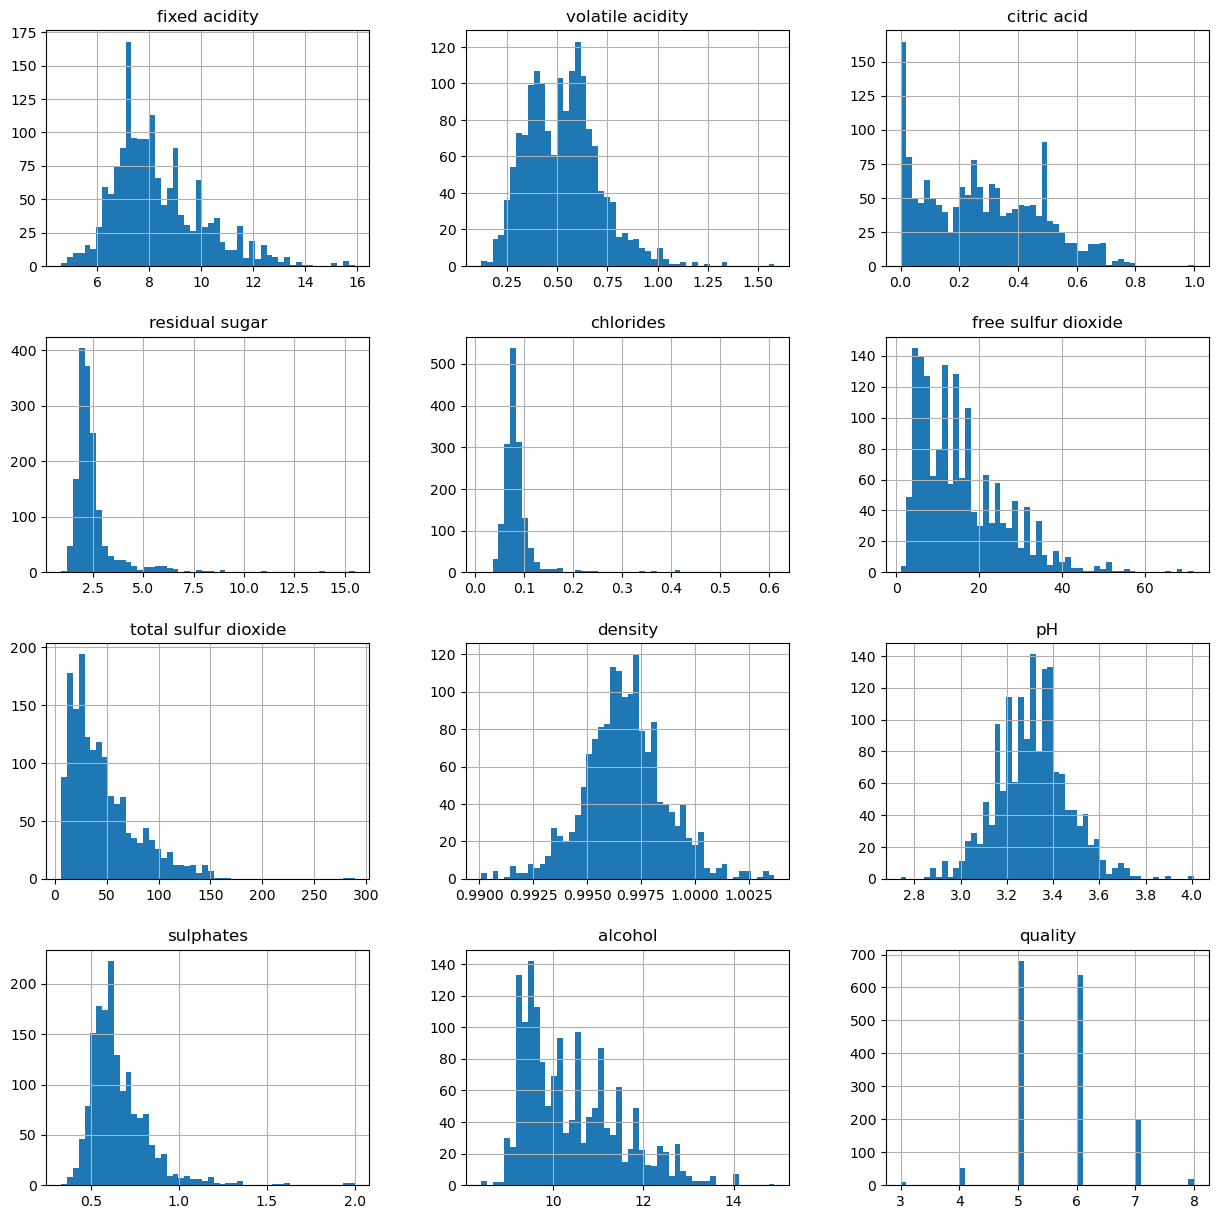

In [6]:
wine.hist(bins=50,figsize=(15,15))

Creamos unas graficas scatter con las columnas que queramos

<Axes: xlabel='alcohol', ylabel='volatile acidity'>

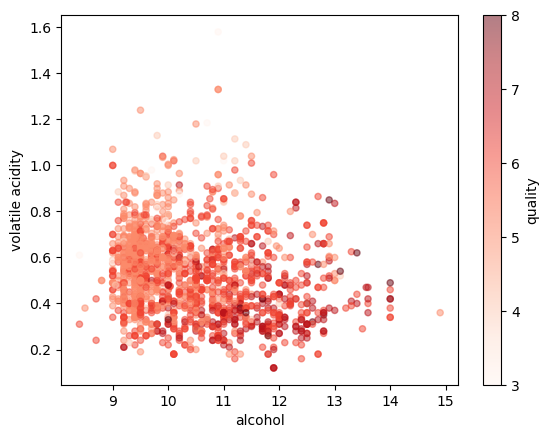

In [7]:
# Alcohol, volatile acidity y la calidad
wine.plot(kind='scatter',x='alcohol',y='volatile acidity',c="quality",cmap='Reds',alpha=0.5)

<Axes: xlabel='alcohol', ylabel='density'>

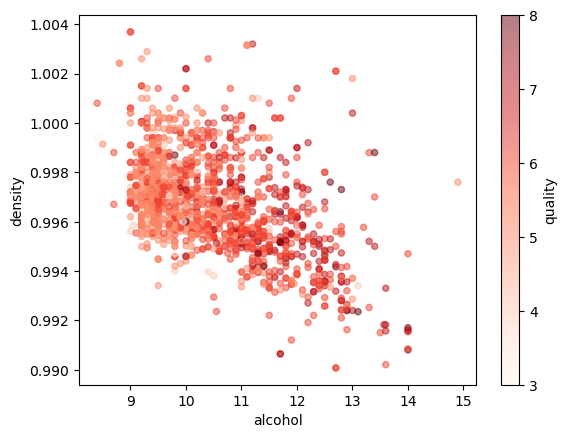

In [8]:
wine.plot(kind='scatter',x='alcohol',y='density',c="quality",cmap='Reds',alpha=0.5)

<Axes: xlabel='alcohol', ylabel='pH'>

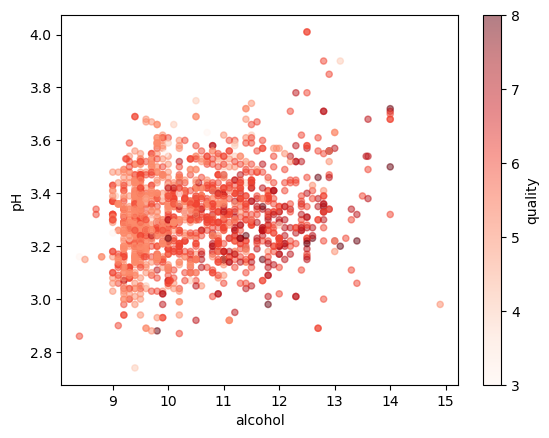

In [9]:
wine.plot(kind='scatter',x='alcohol',y='pH',c="quality",cmap='Reds',alpha=0.5)

In [10]:
# !pip install pillow
# !pip install basemap
# !pip install basemap-data-hires

# Matriz de correlacion

Se relacionan las columnas entre si y se saca un valor entre uno y menos uno. Cuanto mas proximo a los extremos mejor correlacion tienen esas columnas entre si

In [11]:
corr_matrix = wine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Pintamos un scatter con la matriz de correlacion. De esta forma tambien podemos ver de forma grafica, la relacion que tienen cada una de las columnas entre ellas.
Cuanto menos dispersas estean, más correlacion tendrán.

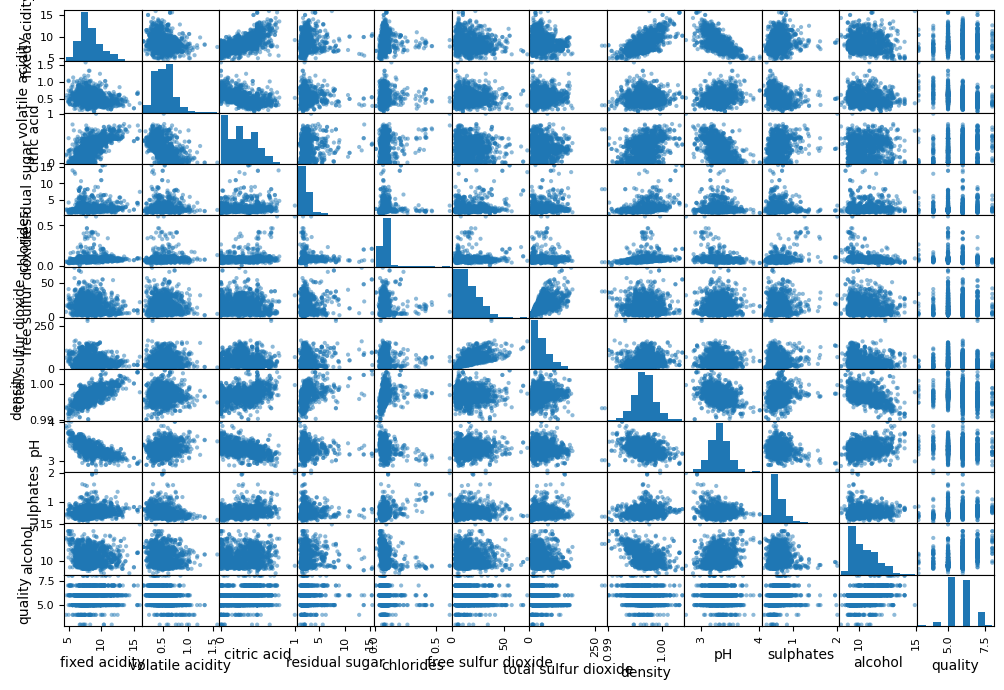

In [12]:
from pandas.plotting import scatter_matrix
matriz = scatter_matrix(wine, figsize=(12,8))

# BOXPLOT

Lo boxplot nos dan una referencia de como de limpios estan los datos y tambien la relacion entre ellos. Podemos ver donde hay outliers, maximo y minimo, media y los quartiles.

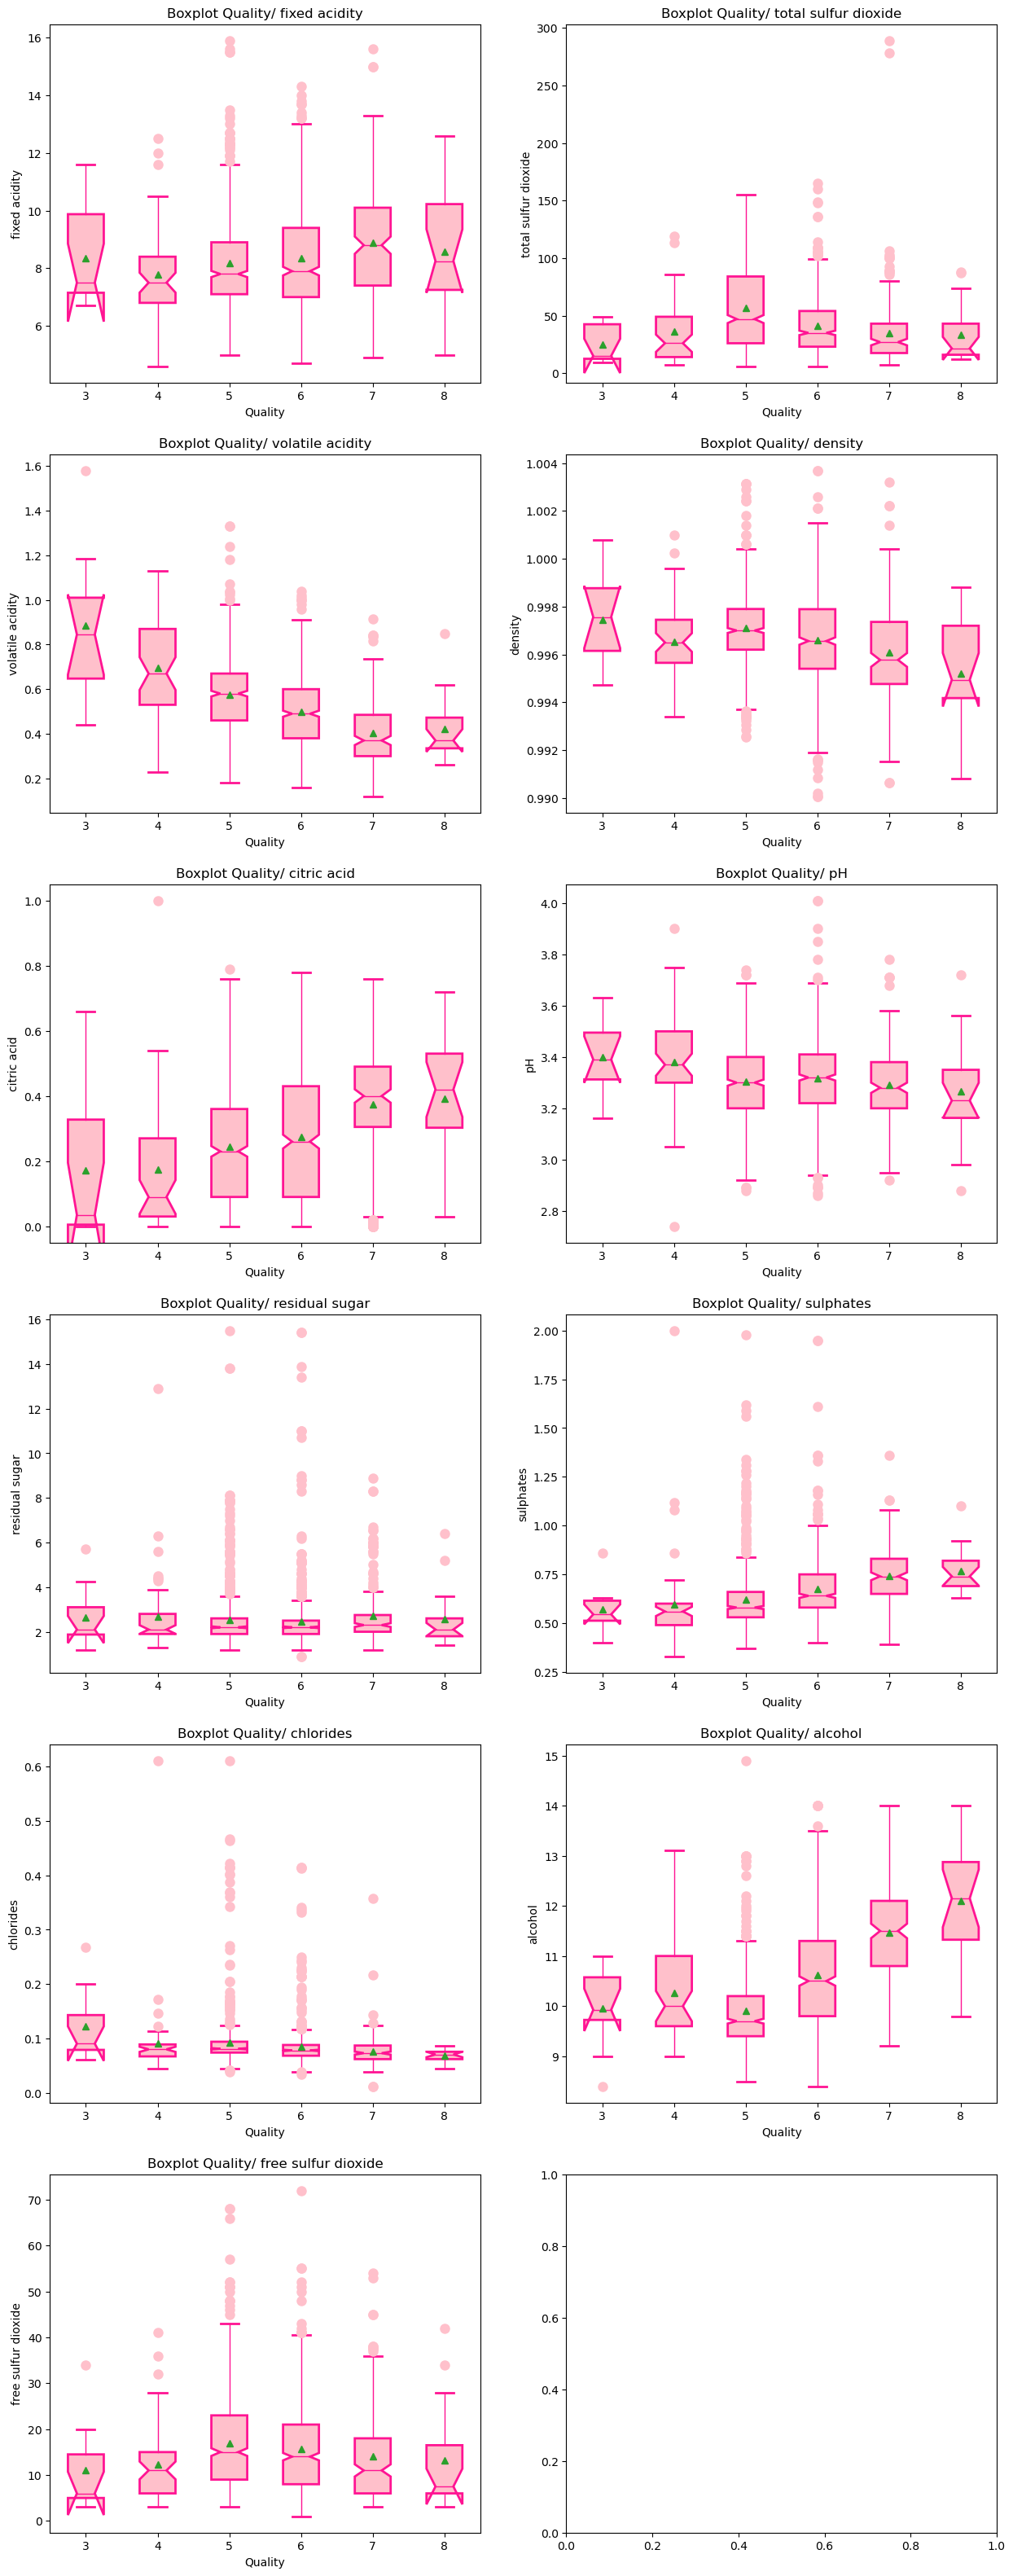

In [13]:
#Hacer un for que vaya recorriendo cada columna excepto la de quality
fig, (axs) = plt.subplots(nrows=6, ncols=2, figsize=(15, 40))
for icol, col in enumerate(wine.columns):
    axs_col = icol//6
    axs_fila = icol % 6
    data_plot = []
    if col != "quality":
        #Conseguir los datos para pasarselo al boxplot, clasificando cada valor de la columna con la columna de calidad
        for i in sorted(wine['quality'].unique()):
            data_plot.append(wine[wine["quality"] == i][col])
            
        axs[axs_fila][axs_col].boxplot(data_plot, labels=sorted(wine['quality'].unique()),notch=True,patch_artist=True,
                    showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                    medianprops=dict(color='deeppink'),
                    flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                    boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                    capprops=dict(color='deeppink', linewidth=2)
                    )
        axs[axs_fila][axs_col].set_xlabel('Quality')
        axs[axs_fila][axs_col].set_ylabel(f'{col}')
        axs[axs_fila][axs_col].set_title(f'Boxplot Quality/ {col}')


# Mapa de calor

Representamos la matriz de correlacion con colores y sus valores. Aqui veremos mas claro las columnas que tengan mayor correlacion

Text(0, 0.5, 'Color bar')

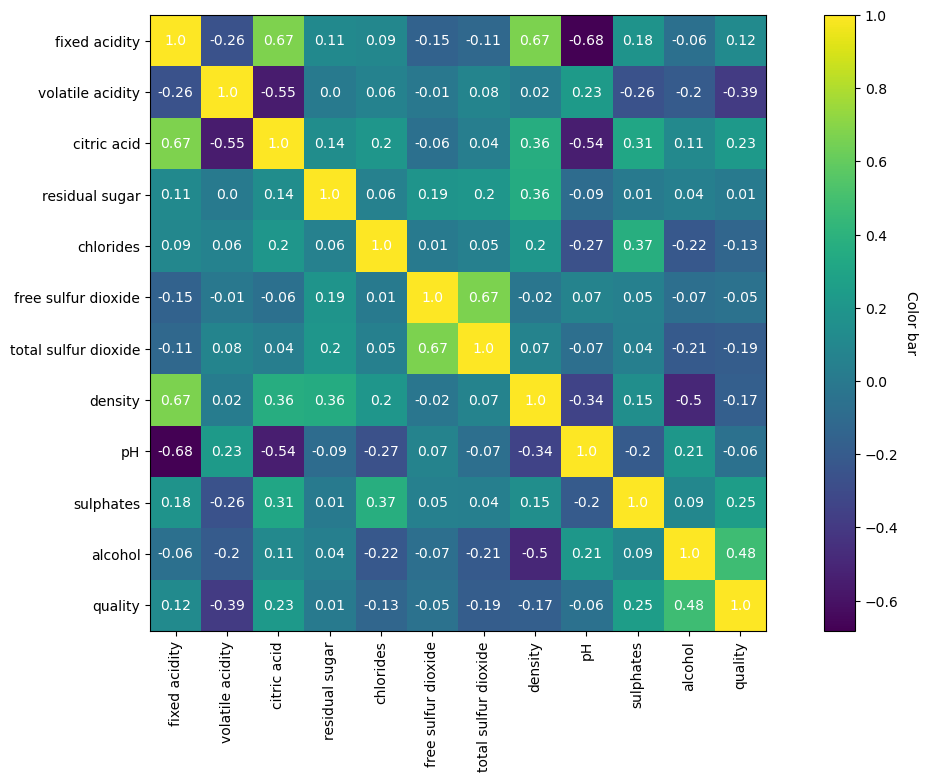

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Etiquetas
xlabs = corr_matrix.columns
ylabs = corr_matrix.index
         
# Mapa de calor
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(corr_matrix)

# Agregar las etiquetas
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Agregar los valores a cada celda
for i in range(len(xlabs)):
    for j in range(len(ylabs)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha = "center", va = "center", color = "w")
        
# Agregar la leyenda
# cbar = fig.colorbar(im, ax=ax, label="corr")
# cbar.outline.set_visible(False)
cbar = ax.figure.colorbar(im, ax = ax)
ax.set_xticklabels(xlabs,rotation=90)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

# Scatters
Despues de hacer el mapa de calor, haremos unos scatrters de los que más relacion tienen, es decir los que mas se acerquen a 1 y -1

### pH y fixed acidity

<Axes: xlabel='pH', ylabel='fixed acidity'>

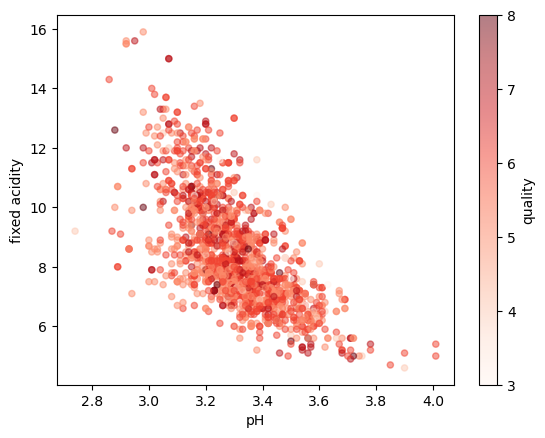

In [15]:
wine.plot(kind='scatter',x='pH',y='fixed acidity',c="quality",cmap='Reds',alpha=0.5)

### total sulfur dioxide y free sulfur dioxide

<Axes: xlabel='total sulfur dioxide', ylabel='free sulfur dioxide'>

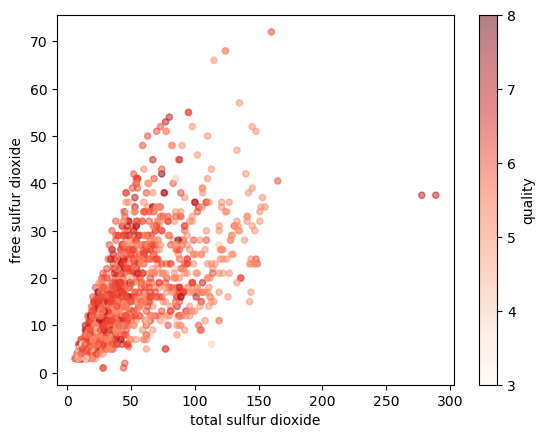

In [16]:
wine.plot(kind='scatter',x='total sulfur dioxide',y='free sulfur dioxide',c="quality",cmap='Reds',alpha=0.5)

### citric acid y fixed acidity

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

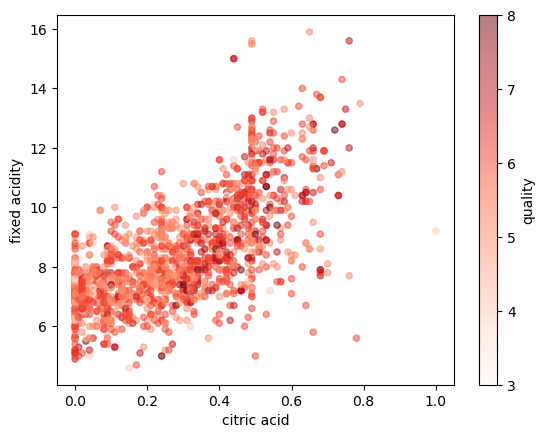

In [17]:
wine.plot(kind='scatter',x='citric acid',y='fixed acidity',c="quality",cmap='Reds',alpha=0.5)

### density y fixed acidity

<Axes: xlabel='density', ylabel='fixed acidity'>

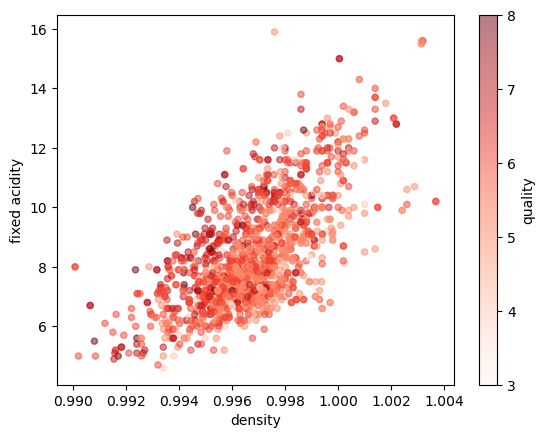

In [18]:
wine.plot(kind='scatter',x='density',y='fixed acidity',c="quality",cmap='Reds',alpha=0.5)

# Entrenamiento del modelo

A continuacion tenemos las funciones que nos ayudarán al entrenamiento de los modelos

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

#Funcion para hacer divisiones de nuestro dataset
def split_train_test(data, test_ratio):
  # indices = [i for i in range(len(data))]; indices = np.shuffle(.....)
  indices = np.random.permutation(len(data))
  lg_test = int(len(data) * test_ratio)
  test_indices = indices[:lg_test]
  train_indices = indices[lg_test:]
  return data.iloc[train_indices], data.iloc[test_indices]

#Mostrar datos sobre las predicciones del modelo
def predictions(x,y,model):
  predicciones = model.predict(x)
  mse = mean_squared_error(y, predicciones)
  mse = np.sqrt(mse)
  mae = mean_absolute_error(y, predicciones)
  score = r2_score(y, predicciones)
  print(f"mae: {mae}  rmse: {mse}  r2_score: {score}")

#Mostrar la puntuacion de los datos generados por el modelo
def get_scores_media_desviacion(model,x,y):
  lin_score = cross_val_score(model, x, y, scoring = "neg_mean_squared_error", cv=10)
  root_lin_score = np.sqrt(-lin_score)
  print("Scores: ", root_lin_score)
  print("Media: ", root_lin_score.mean())
  print("Desviación Std", root_lin_score.std())

np.random.seed(42)

datos_train, datos_test = split_train_test(wine, 0.2)
len(datos_train), len(datos_test)

(1280, 319)

### Eliminacion de outliers

In [20]:
#Para esto primero analizar los scatters para ver cuales tienen outliers y aplicarlo a esas columnas

# Seleccionamos las clumnas que vamos a usar para el entrenamiento
columnas = ["alcohol", "sulphates", "citric acid", "volatile acidity","quality"]
wine_filtrado =  wine.copy()

for col in columnas:
    #Pintar procesamiento de las columnas
    if col != 'quality':
        print(f"Procesando columna {col}, registros actuales: {len(wine_filtrado[col])}")
        q_low = wine_filtrado[col].quantile(0.01)
        q_hi  = wine_filtrado[col].quantile(0.99)

        wine_filtrado = wine_filtrado[(wine_filtrado[col] < q_hi) & (wine_filtrado[col] > q_low)]
for col in columnas:
    print(f"Columna {col}, registros procesados: {len(wine_filtrado[col])}")

Procesando columna alcohol, registros actuales: 1599
Procesando columna sulphates, registros actuales: 1545
Procesando columna citric acid, registros actuales: 1511
Procesando columna volatile acidity, registros actuales: 1370
Columna alcohol, registros procesados: 1341
Columna sulphates, registros procesados: 1341
Columna citric acid, registros procesados: 1341
Columna volatile acidity, registros procesados: 1341
Columna quality, registros procesados: 1341


### Division de los datos para el entrenamiento del modelo

In [21]:
# Utilizando ya un sistema de entrenamiento
from sklearn.model_selection import train_test_split

y = wine_filtrado["quality"].copy()
x = wine_filtrado[["alcohol", "sulphates", "citric acid", "volatile acidity"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

### Scaler

Pone las x de las columnas entre un valor de 0 y 1. Se utiliza mas para redes neuronales.

In [22]:
# # si quisiésemos escalar una columna
# from sklearn.preprocessing import MinMaxScaler
# general_scaler = MinMaxScaler()
# #Intentar devolver en unas columnas nuevas por no sobreescribir los datos
# wine_filtrado[["alcohol_s", "sulphates_s", "citric acid_s", "volatile acidity_s"]] = general_scaler.fit_transform(wine_filtrado[["alcohol", "sulphates", "citric acid", "volatile acidity"]])

Otra forma de aplicar el scaler

In [23]:
# más cómodo, aplicar a todas las X
# from sklearn.discriminant_analysis import StandardScaler

# scaler = StandardScaler()
# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

### Modelo de Regresion Linear

In [24]:
# Utilizando el modelo de Regresion Linear
from sklearn.linear_model import LinearRegression

#Creamos el modelo
lin_reg = LinearRegression()
#Entrenamos el modelo
lin_reg.fit(x_train,y_train)
#Sacamos las predicciones del modelo
predictions(x_train,y_train,lin_reg)
# cross-validation lineal
get_scores_media_desviacion(lin_reg,x_train,y_train)

mae: 0.4988195946925955  rmse: 0.6369490589059349  r2_score: 0.33824626932833946
Scores:  [0.56453438 0.65592238 0.57583828 0.68573512 0.57304185 0.68355908
 0.70077376 0.6328823  0.71680546 0.59554143]
Media:  0.6384634031805343
Desviación Std 0.05489438906249749


### Modelo de Arbol de Regresion

In [25]:
# Modelo de Regresión de Arbol de Decision
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

#Sacamos las predicciones del modelo
predictions(x_train,y_train,tree_reg)

# NO SE DEBERÍA UTILIZAR TODAVÍA LOS DATOS DE TEST
# Predicciones de DecisionTreeRegressor con datos de test
predictions(x_test,y_test,tree_reg)
# cross-validation arbol decision
get_scores_media_desviacion(tree_reg,x_train,y_train)

mae: 0.0  rmse: 0.0  r2_score: 1.0
mae: 0.483271375464684  rmse: 0.7808107501240577  r2_score: 0.007335403447189637
Scores:  [0.71362403 0.82214714 0.6971236  0.85379855 0.76120907 0.78538044
 0.82598002 0.74883086 0.96673649 0.71040333]
Media:  0.7885233536368378
Desviación Std 0.07807197756145524


### Modelo de Random Forest

In [26]:
# regresión random forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)

rf_reg.fit(x_train, y_train)

predictions(x_test,y_test,rf_reg)

get_scores_media_desviacion(rf_reg,x_train,y_train)


mae: 0.4282527881040892  rmse: 0.5613512640367774  r2_score: 0.4869255659061248
Scores:  [0.58375778 0.65448312 0.53915736 0.62662946 0.58813661 0.60531679
 0.66741026 0.60044765 0.67237826 0.53327502]
Media:  0.6070992297111815
Desviación Std 0.0464148376783808


### Modelo de SVR 

In [27]:
# regresión SVM
from sklearn.svm import SVR

sv_reg = SVR()

sv_reg.fit(x_train, y_train)

predictions(x_test,y_test,sv_reg)

get_scores_media_desviacion(sv_reg,x_train,y_train)

mae: 0.494664544663085  rmse: 0.6508090809099826  r2_score: 0.3103667804505087
Scores:  [0.56738348 0.65140245 0.58213576 0.72716722 0.59862416 0.71799541
 0.72943963 0.67172538 0.75262435 0.59084043]
Media:  0.6589338271893348
Desviación Std 0.06683320356031579


### Modelo XGBoost

In [28]:
# regresión xgboost
import xgboost as xgb

# xgb_reg = xgb.XGBRegressor(objetive="reg:squarederror")
xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(x_train, y_train)

predictions(x_test,y_test,xgb_reg)

get_scores_media_desviacion(xgb_reg,x_train,y_train)

mae: 0.42358307501640463  rmse: 0.5854880965332335  r2_score: 0.44185491486772444
Scores:  [0.67411536 0.67676077 0.56936619 0.64704662 0.5923319  0.6235335
 0.68901354 0.64730681 0.73727097 0.58394784]
Media:  0.6440693493052893
Desviación Std 0.04999100266644351
